Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

#### Mounting Google Drive

In [1]:
import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing Libararies

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import os

import matplotlib.pyplot as plt

#### Path to Flower Directory

In [3]:
DATADIR = '/content/drive/MyDrive/flowers/flowers'
IMG_SIZE = 180
CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


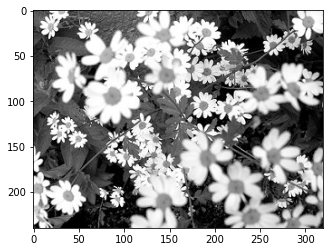

In [4]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # For Plotting Imges
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

#### Importing Images in Greyscale

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to flowers
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=daisy 1=dandelion 2=rose 3=sunflower 4=tulip

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 984/984 [00:03<00:00, 303.82it/s]

4323


#### Shuffling Data

In [6]:
import random
random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

4
1
3
2
2
2
2
3
1
0


#### Making Samples and Labels from given data

In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X.astype('float32') / 255
y = np.array(y)
print(X[0])

[[[0.5764706 ]
  [0.5294118 ]
  [0.53333336]
  ...
  [0.32941177]
  [0.35686275]
  [0.4117647 ]]

 [[0.5529412 ]
  [0.50980395]
  [0.45490196]
  ...
  [0.32941177]
  [0.32941177]
  [0.3529412 ]]

 [[0.7019608 ]
  [0.69803923]
  [0.45882353]
  ...
  [0.31764707]
  [0.3529412 ]
  [0.3764706 ]]

 ...

 [[0.10196079]
  [0.11764706]
  [0.11764706]
  ...
  [0.22352941]
  [0.22352941]
  [0.24705882]]

 [[0.08235294]
  [0.12941177]
  [0.15686275]
  ...
  [0.23921569]
  [0.2509804 ]
  [0.30588236]]

 [[0.09019608]
  [0.09803922]
  [0.1882353 ]
  ...
  [0.21568628]
  [0.21568628]
  [0.22352941]]]


#### Spliting Data for training and testing

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

In [10]:
x_train.shape, y_train.shape

((2593, 180, 180, 1), (2593,))

#### Building Our Model

In [11]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=x_train.shape[1:]))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dense(64))
  model.add(layers.Dense(5, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [12]:
model = build_model()
train_model = model.fit(x_train, y_train, epochs= 25, batch_size=64)

Epoch 1/25
41/41 [==============================] - 8s 172ms/step - loss: 150.0818 - accuracy: 0.2518
Epoch 2/25
41/41 [==============================] - 7s 172ms/step - loss: 9.3179 - accuracy: 0.3190
Epoch 3/25
41/41 [==============================] - 7s 172ms/step - loss: 9.1346 - accuracy: 0.2978
Epoch 4/25
41/41 [==============================] - 7s 172ms/step - loss: 2.3706 - accuracy: 0.4560
Epoch 5/25
41/41 [==============================] - 7s 172ms/step - loss: 1.4948 - accuracy: 0.5528
Epoch 6/25
41/41 [==============================] - 7s 172ms/step - loss: 2.1549 - accuracy: 0.4835
Epoch 7/25
41/41 [==============================] - 7s 172ms/step - loss: 1.4056 - accuracy: 0.5698
Epoch 8/25
41/41 [==============================] - 7s 172ms/step - loss: 0.9893 - accuracy: 0.6544
Epoch 9/25
41/41 [==============================] - 7s 172ms/step - loss: 0.9464 - accuracy: 0.6759
Epoch 10/25
41/41 [==============================] - 7s 172ms/step - loss: 1.0642 - accuracy: 0.64

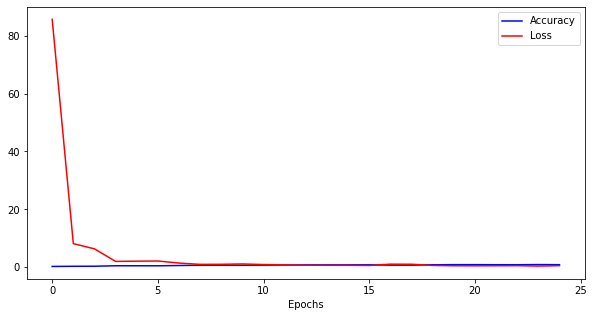

In [13]:
  plt.figure(figsize=(10,5))
  plt.plot(train_model.history["accuracy"], label="Accuracy", color = "b")
  plt.plot(train_model.history["loss"], label = "Loss", color = "r")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

#### Tesing Our model


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)

55/55 [==============================] - 2s 34ms/step - loss: 3.1434 - accuracy: 0.2827
3.1434385776519775 0.28265896439552307


As We can see that the value of accuracy is lower then the trained one because the data set is lower and there are better layers that can do better